In [12]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

In [2]:
data = pd.read_csv("ourData.csv")
data

,index,url,product_name,categories,countries_fr,nutriscore_score,nutriscore_grade,food_groups_tags,image_url,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts_100g
0,825939,http://world-fr.openfoodfacts.org/produit/1200...,Cranberry,"aliments et boissons à base de végétaux, boiss...",France,13.0,e,"en:beverages,en:sweetened-beverages",https://images.openfoodfacts.org/images/produc...,167.0,0.00,9.30,0.0,0.0,0.00,27.0
1,892227,http://world-fr.openfoodfacts.org/produit/2044...,8 galette de légumes,"aliments et boissons à base de végétaux, alime...",France,-2.0,a,"en:composite-foods,en:one-dish-meals",https://images.openfoodfacts.org/images/produc...,464.0,0.80,3.10,3.0,2.5,0.84,75.0
2,894012,http://world-fr.openfoodfacts.org/produit/2050...,Dessert glacé aux 3 chocolats (650 g / 900 ml),"desserts, surgelés, desserts glacés, glaces et...",France,14.0,d,"en:milk-and-dairy-products,en:ice-cream",https://images.openfoodfacts.org/images/produc...,1008.0,7.00,30.80,1.0,4.0,0.15,0.0
3,896995,http://world-fr.openfoodfacts.org/produit/2059...,Couscous,"surgelés, plats préparés, plats à base de semo...",France,4.0,c,"en:composite-foods,en:one-dish-meals",https://images.openfoodfacts.org/images/produc...,448.0,1.10,2.40,0.0,4.6,1.04,25.0
4,897568,http://world-fr.openfoodfacts.org/produit/2060...,Champignons émincés,"aliments et boissons à base de végétaux, alime...",France,-7.0,a,"en:fruits-and-vegetables,en:vegetables",https://images.openfoodfacts.org/images/produc...,59.0,0.00,0.20,1.5,2.3,0.02,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,2046519,http://world-fr.openfoodfacts.org/produit/5400...,Crème Glacée Vanille,"desserts, surgelés, desserts glacés, glaces et...",Belgique,11.0,d,"en:milk-and-dairy-products,en:ice-cream",https://images.openfoodfacts.org/images/produc...,782.0,5.20,21.80,0.1,2.9,0.13,0.0
1217,2271223,http://world-fr.openfoodfacts.org/produit/7610...,Succédané de Café aux Fruits et Céréales Bio,"boissons, surgelés, boissons sans sucre ajouté",France,14.0,e,"en:beverages,en:unsweetened-beverages",https://images.openfoodfacts.org/images/produc...,1506.0,0.00,5.00,0.0,5.0,0.20,0.0
1218,2726922,http://world-fr.openfoodfacts.org/produit/8431...,Choc & roll,"snacks, snacks sucrés, surgelés, biscuits et g...",Espagne,24.0,e,"en:sugary-snacks,en:biscuits-and-cakes",https://images.openfoodfacts.org/images/produc...,2112.0,13.00,44.00,3.0,4.4,0.55,0.0
1219,2757585,http://world-fr.openfoodfacts.org/produit/8436...,Paëlla aux Fruits de Mer,"surgelés, plats préparés, en:meat-based-produc...",France,-1.0,a,"en:composite-foods,en:one-dish-meals",https://images.openfoodfacts.org/images/produc...,523.0,0.62,1.04,1.1,6.4,0.65,0.0


## Part 4

original formula: 

$Nutri score = x_{en} + x_{su} + x_{fa} + x_{sa} - x_{pr} - x_{fi} - x_{fr}$

In [3]:
data_part4 = data.copy()
data_part4 = data_part4[["product_name","nutriscore_score","nutriscore_grade",
                        'energy_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'fruits-vegetables-nuts_100g']]
data_part4

,product_name,nutriscore_score,nutriscore_grade,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts_100g
0,Cranberry,13.0,e,167.0,0.00,9.30,0.0,0.0,0.00,27.0
1,8 galette de légumes,-2.0,a,464.0,0.80,3.10,3.0,2.5,0.84,75.0
2,Dessert glacé aux 3 chocolats (650 g / 900 ml),14.0,d,1008.0,7.00,30.80,1.0,4.0,0.15,0.0
3,Couscous,4.0,c,448.0,1.10,2.40,0.0,4.6,1.04,25.0
4,Champignons émincés,-7.0,a,59.0,0.00,0.20,1.5,2.3,0.02,100.0
...,...,...,...,...,...,...,...,...,...,...
1216,Crème Glacée Vanille,11.0,d,782.0,5.20,21.80,0.1,2.9,0.13,0.0
1217,Succédané de Café aux Fruits et Céréales Bio,14.0,e,1506.0,0.00,5.00,0.0,5.0,0.20,0.0
1218,Choc & roll,24.0,e,2112.0,13.00,44.00,3.0,4.4,0.55,0.0
1219,Paëlla aux Fruits de Mer,-1.0,a,523.0,0.62,1.04,1.1,6.4,0.65,0.0


In [4]:
data_part4.columns

Index(['product_name', 'nutriscore_score', 'nutriscore_grade', 'energy_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'fruits-vegetables-nuts_100g'],
      dtype='object')

In [5]:
print("Correlation of Energy and other Components")
print("saturated-fat_100g",np.corrcoef(data_part4.energy_100g,data_part4["saturated-fat_100g"])[0,1])
print("sugars_100g",np.corrcoef(data_part4.energy_100g,data_part4['sugars_100g'])[0,1])
print("fiber_100g",np.corrcoef(data_part4.energy_100g,data_part4["fiber_100g"])[0,1])
print("proteins_100g",np.corrcoef(data_part4.energy_100g,data_part4['proteins_100g'])[0,1])
print("salt_100g",np.corrcoef(data_part4.energy_100g,data_part4['salt_100g'])[0,1])
print('fruits-vegetables-nuts_100g',np.corrcoef(data_part4.energy_100g,data_part4['fruits-vegetables-nuts_100g'])[0,1])

Correlation of Energy and other Components
saturated-fat_100g 0.6936961195363472
sugars_100g 0.35707190757839546
fiber_100g 0.1166200056963546
proteins_100g 0.33820011853468
salt_100g 0.286821508763606
fruits-vegetables-nuts_100g -0.5308409928889883


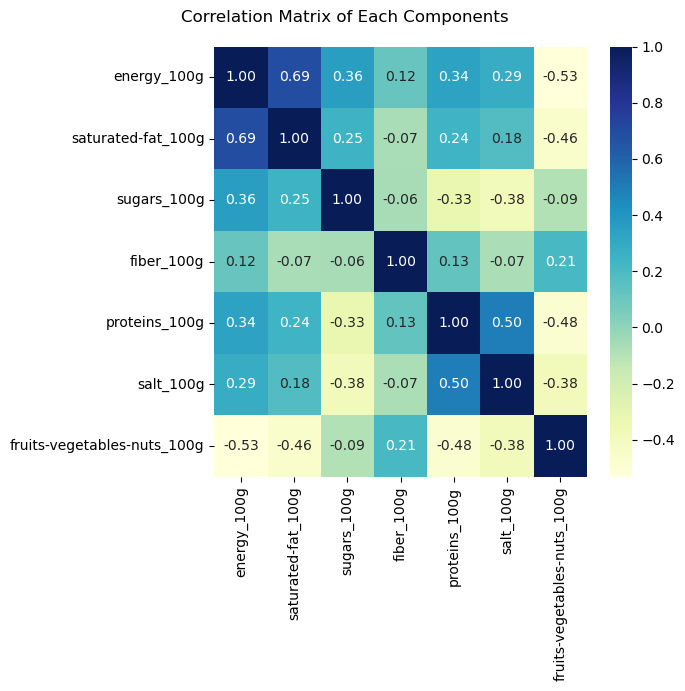

In [6]:
fig,ax = plt.subplots(1,1,figsize = (7,7))

sns.heatmap(np.corrcoef(data_part4.iloc[:,-7:],rowvar=False),annot=True,ax = ax,cmap="YlGnBu",fmt=".2f")
ax.set_xticklabels(data_part4.columns[-7:])
ax.set_yticklabels(data_part4.columns[-7:])
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.suptitle("Correlation Matrix of Each Components")
plt.tight_layout()

fig.savefig("./images/corr_matrix_part4.jpg",dpi = 300)

## The weight is for the point, not for the nutrient value
## First Convert nutrient values into points

In [7]:
data_for_func = data_part4.iloc[:,-7:]
data_for_func["salt_100g"] = data_for_func["salt_100g"] * 1000
data_for_func

,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts_100g
0,167.0,0.00,9.30,0.0,0.0,0.0,27.0
1,464.0,0.80,3.10,3.0,2.5,840.0,75.0
2,1008.0,7.00,30.80,1.0,4.0,150.0,0.0
3,448.0,1.10,2.40,0.0,4.6,1040.0,25.0
4,59.0,0.00,0.20,1.5,2.3,20.0,100.0
...,...,...,...,...,...,...,...
1216,782.0,5.20,21.80,0.1,2.9,130.0,0.0
1217,1506.0,0.00,5.00,0.0,5.0,200.0,0.0
1218,2112.0,13.00,44.00,3.0,4.4,550.0,0.0
1219,523.0,0.62,1.04,1.1,6.4,650.0,0.0


In [8]:
def value_to_points_for_red(threshold,data,col_name):
    for i in range(10):
        data.loc[(data[col_name] > i * threshold) & (data[col_name] <= (i+1) * threshold),col_name] = i
    data.loc[(data[col_name] > 10 * threshold),col_name] = 10
    
    return data

def value_to_points_for_fruit_vege(data,col_name):
    data.loc[(data[col_name] > 0) & (data[col_name] <= 40),col_name] = 0
    data.loc[(data[col_name] > 40) & (data[col_name] <= 60),col_name] = 1
    data.loc[(data[col_name] > 60) & (data[col_name] <= 80),col_name] = 2
    data.loc[(data[col_name] > 80),col_name] = 5
    return data

def value_to_points_for_fibers(data,col_name):
    data.loc[(data[col_name] > 0) & (data[col_name] <= 0.9),col_name] = 0
    data.loc[(data[col_name] > 0.9) & (data[col_name] <= 1.9),col_name] = 1
    data.loc[(data[col_name] > 1.9) & (data[col_name] <= 2.8),col_name] = 2
    data.loc[(data[col_name] > 2.8) & (data[col_name] <= 3.7),col_name] = 3
    data.loc[(data[col_name] > 3.7) & (data[col_name] <= 4.7),col_name] = 4
    data.loc[(data[col_name] > 4.7),col_name] = 5
    return data

def value_to_points_for_proteins(data,col_name):
    data.loc[(data[col_name] > 0) & (data[col_name] <= 1.6),col_name] = 0
    data.loc[(data[col_name] > 1.6) & (data[col_name] <= 3.2),col_name] = 1
    data.loc[(data[col_name] > 3.2) & (data[col_name] <= 4.8),col_name] = 2
    data.loc[(data[col_name] > 4.8) & (data[col_name] <= 6.4),col_name] = 3
    data.loc[(data[col_name] > 6.4) & (data[col_name] <= 8.0),col_name] = 4
    data.loc[(data[col_name] > 8),col_name] = 5
    return data
    

In [9]:
data_for_func = value_to_points_for_red(335,data_for_func,"energy_100g")
data_for_func = value_to_points_for_red(4.5,data_for_func,"sugars_100g")
data_for_func = value_to_points_for_red(1,data_for_func,"saturated-fat_100g")
data_for_func = value_to_points_for_red(90,data_for_func,"salt_100g")
data_for_func = value_to_points_for_fruit_vege(data_for_func,"fruits-vegetables-nuts_100g")
data_for_func = value_to_points_for_fibers(data_for_func,"fiber_100g")
data_for_func = value_to_points_for_proteins(data_for_func,"proteins_100g")
data_for_func

,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts_100g
0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,3.0,1.0,9.0,2.0
2,3.0,6.0,6.0,1.0,2.0,1.0,0.0
3,1.0,1.0,0.0,0.0,2.0,10.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...
1216,2.0,5.0,4.0,0.0,1.0,1.0,0.0
1217,4.0,0.0,1.0,0.0,3.0,2.0,0.0
1218,6.0,10.0,9.0,3.0,2.0,6.0,0.0
1219,1.0,0.0,0.0,1.0,3.0,7.0,0.0


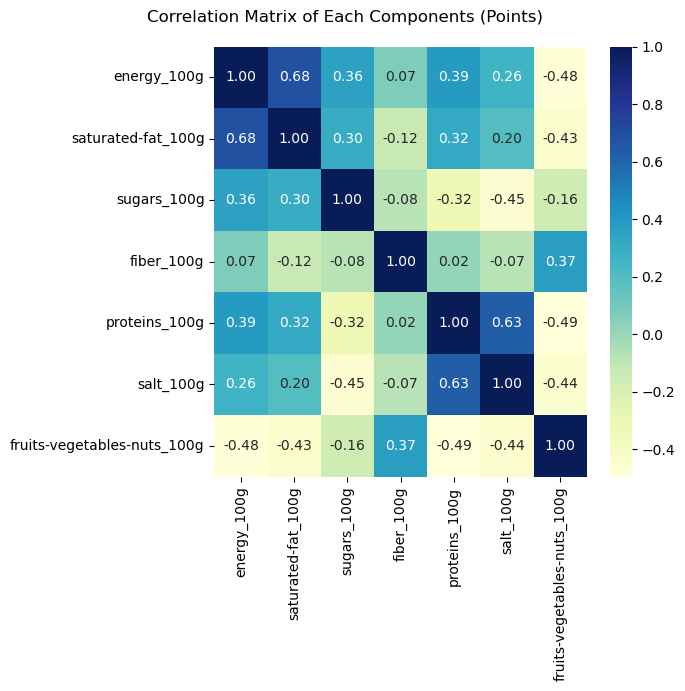

In [10]:
fig,ax = plt.subplots(1,1,figsize = (7,7))

sns.heatmap(np.corrcoef(data_for_func,rowvar=False),annot=True,ax = ax,cmap="YlGnBu",fmt=".2f")
ax.set_xticklabels(data_for_func.columns)
ax.set_yticklabels(data_for_func.columns)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.suptitle("Correlation Matrix of Each Components (Points)")
plt.tight_layout()

fig.savefig("./images/corr_matrix_points_part4.jpg",dpi = 300)

In [11]:
model = LinearRegression(fit_intercept=False)
model.fit(data_for_func,data["nutriscore_score"])
model.coef_

array([ 1.19107301,  1.17681212,  0.99031351, -1.09011387, -1.00555549,
        0.46012755, -0.89862   ])

In [20]:
def optimize_vector(new_vect,original_vects,new_vect_from):
    corr = []
    for vec in original_vects:
        corr.append(np.abs(np.corrcoef(new_vect,vec)[0,1]))
    corr2 = np.abs(np.corrcoef(new_vect,new_vect_from)[0,1])
    
    return (corr2 - 1) ** 2 + np.sum(np.square(corr))

res = minimize(optimize_vector,x0= np.array(data_for_func["energy_100g"]),args=([np.array(data_for_func["energy_100g"])],
                                                                         data_for_func["saturated-fat_100g"]))
    

In [22]:
np.corrcoef(res.x,data["saturated-fat_100g"])

array([[1.        , 0.72913888],
       [0.72913888, 1.        ]])

In [10]:
def corr_optimize_func(weights):
    new_data = data_for_func.copy()
    for i,col in enumerate(new_data.columns):
        new_data[col] = new_data[col] * weights[i]
    
    corr_mat = np.corrcoef(data_for_func,rowvar=False)
    
    corr_square_sum = (np.sum(corr_mat ** 2) - 1 * data_for_func.shape[1])/2
    
    
    return corr_square_sum

res = minimize(corr_optimize_func,x0=np.array([1,1,1,1,1,1,1]))
res
    

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.8050862627720035
        x: [ 1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00
             1.000e+00  1.000e+00]
      nit: 0
      jac: [-1.788e-07 -1.788e-07 -5.960e-08 -5.960e-08  1.192e-07
             5.960e-08 -5.960e-08]
 hess_inv: [[1 0 ... 0 0]
            [0 1 ... 0 0]
            ...
            [0 0 ... 1 0]
            [0 0 ... 0 1]]
     nfev: 8
     njev: 1

In [11]:
res.x

array([1., 1., 1., 1., 1., 1., 1.])

## Part 6 ML

In [110]:
def AnotherMethodNutriScore(dataframe):
    df = dataframe[[
       'nutriscore_grade', 
       'energy_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'fruits-vegetables-nuts_100g']]
    
    rf = RandomForestClassifier(n_estimators=100,min_samples_split=2,min_samples_leaf=1,random_state=42)
    knn = KNeighborsClassifier(n_neighbors=5)
    nb = GaussianNB()
    
    X = df.drop(["nutriscore_grade"],axis = 1)
    y = df["nutriscore_grade"]
    
    rf.fit(X,y)
    knn.fit(X,y)
    nb.fit(X,y)
    
    rf_pred = rf.predict(X)
    knn_pred = knn.predict(X)
    nb_pred = nb.predict(X)
    
    rf_score = pd.Series([accuracy_score(y,rf_pred),precision_score(y,rf_pred,average="macro"),recall_score(y,rf_pred,average="macro"),f1_score(y,rf_pred,average="macro")])
    knn_score = pd.Series([accuracy_score(y,knn_pred),precision_score(y,knn_pred,average="macro"),recall_score(y,knn_pred,average="macro"),f1_score(y,knn_pred,average="macro")])
    nb_score = pd.Series([accuracy_score(y,nb_pred),precision_score(y,nb_pred,average="macro"),recall_score(y,nb_pred,average="macro"),f1_score(y,nb_pred,average="macro")])
    
    metric_df = pd.DataFrame(pd.concat([rf_score,knn_score,nb_score],axis= 1)).rename(columns= {0: "Random Forest",
                                                                                               1:"K-Nearest Neighbor",
                                                                                               2:"Gaussian Naive Bayes"})
    metric_df.index = pd.Index(["Accuracy","Precision","Recall","F1-Score"])
    
    pred_df = pd.DataFrame(pd.concat([pd.Series(rf_pred),pd.Series(knn_pred),pd.Series(nb_pred)],axis = 1)).rename(columns=
                                {0: "rf_pred",
                                1:"knn_pred",
                                2:"nb_pred"})
    
    rf_confusion_mat = confusion_matrix(y,rf_pred)
    knn_confusion_mat = confusion_matrix(y,knn_pred)
    nb_confusion_mat = confusion_matrix(y,nb_pred)
    
    
    fig,ax = plt.subplots(1,3,figsize = (12,3))
    
    mat_cols = ["A","B","C","D","E"]
    model_name = ["Random Forest","K-Nearest Neighbor","Gaussian Naive Bayes"]
    
    sns.heatmap(pd.DataFrame(rf_confusion_mat,columns=mat_cols),annot=True,ax=ax[0],fmt="d",cmap='Blues')
    sns.heatmap(knn_confusion_mat,annot=True,ax=ax[1],fmt="d",cmap='Blues')
    sns.heatmap(nb_confusion_mat,annot=True,ax=ax[2],fmt="d",cmap='Blues')
    for i,a_x in enumerate(ax):
        a_x.xaxis.set_ticklabels(mat_cols) 
        a_x.yaxis.set_ticklabels(mat_cols)
        a_x.set_xlabel("Pred")
        a_x.set_ylabel("True")
        a_x.set_title(f"Confusion Matrix {model_name[i]} ")
    
    plt.tight_layout()
    
    fig.savefig("./images/Confusion_Matrix_Part6.jpg",dpi = 300)
    
    
    return pred_df, metric_df

(     rf_pred knn_pred nb_pred
 0          e        a       a
 1          a        a       a
 2          d        d       d
 3          c        b       b
 4          a        a       a
 ...      ...      ...     ...
 1216       d        d       c
 1217       e        a       c
 1218       e        e       e
 1219       a        b       b
 1220       d        d       d
 
 [1221 rows x 3 columns],
            Random Forest  K-Nearest Neighbor  Gaussian Naive Bayes
 Accuracy             1.0            0.808354              0.674038
 Precision            1.0            0.772202              0.609335
 Recall               1.0            0.745034              0.605702
 F1-Score             1.0            0.755425              0.598912)

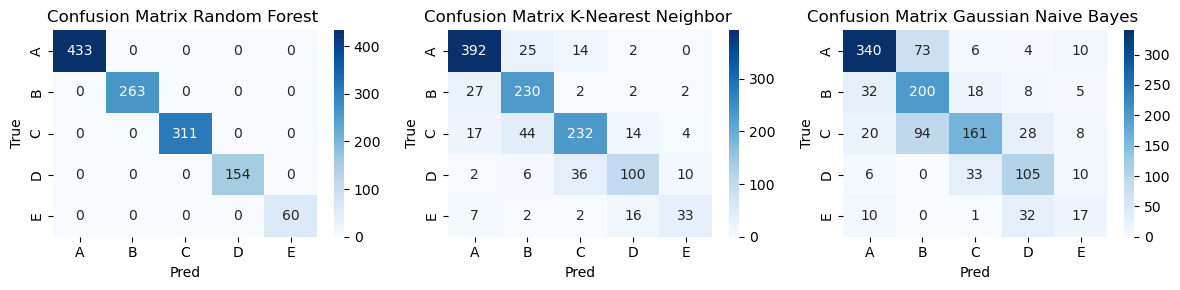

In [111]:
AnotherMethodNutriScore(data)